In [1]:
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy as sp
from sklearn import manifold
import struct

In [2]:
def read_idx(filename):
    with gzip.open(filename) as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
def find_landmarks(Y, n, m):
    xr = np.linspace(np.min(Y[:,0]), np.max(Y[:,0]), n)
    yr = np.linspace(np.min(Y[:,1]), np.max(Y[:,1]), m)
    xg, yg = np.meshgrid(xr, yr)
    idx = [0]*(n*m)
    for i, x, y in zip(range(n*m), xg.flatten(), yg.flatten()):
        idx[i] = int(np.sum(np.abs(Y-np.array([x,y]))**2, axis=-1).argmin())
    return idx

In [22]:
# TODO - We only have to implement this function, swap it with the manifold
def locally_linear_embedding(X, n_neighbors, n_components):
    
    Y = X[:,0:2]   # placeholder
    err = 0.001    # placeholder
    return Y, err

In [23]:
raw_train = read_idx("train-images-idx3-ubyte.gz")
train_data = np.reshape(raw_train, (60000, 28*28))
train_label = read_idx("train-labels-idx1-ubyte.gz")

In [24]:
X = train_data[train_label == 4]
#Y, err = manifold.locally_linear_embedding(X, n_neighbors=10, n_components=2)
Y, err = locally_linear_embedding(X, n_neighbors=10, n_components=2)
landmarks = find_landmarks(Y, 5, 5)

In [25]:
print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

X.shape:  (5842, 784)
Y.shape:  (5842, 2)


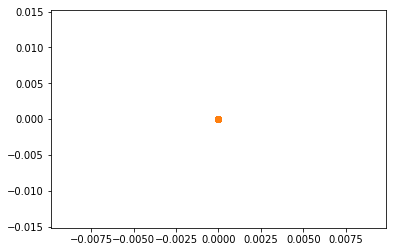

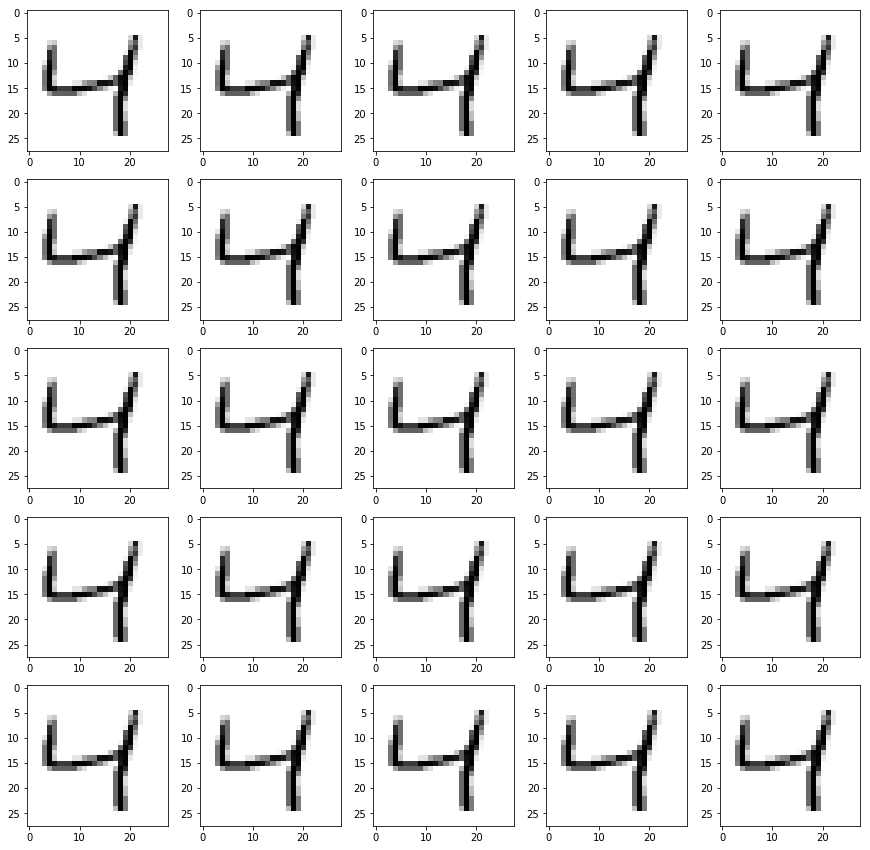

In [26]:
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[landmarks,0], Y[landmarks,1])
fig = plt.figure(figsize=(15,15))
for i in range(len(landmarks)):
    ax = fig.add_subplot(5, 5, i+1)
    imgplot = ax.imshow(np.reshape(X[landmarks[i]], (28,28)), cmap=plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation("nearest")
plt.show()